<H1>Small Swarm Analysis</H1>


In [1]:
import pandas as pd
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
#SMALL_SIZE = 8
#MEDIUM_SIZE = 10
#BIGGER_SIZE = 36
#Font sizes modifiers for inclusion in papers. 
#plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
#plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
#plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
#plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 120)
%matplotlib inline

In [2]:
# load all particle data from simulator
S = pd.read_csv('csv/small/exp.p.csv')

<h1>LOADED DATA</h1>

<code>IMAG</code> is equivalent to $v(b) = v_c(b) + v_r(b)$ <br>
<code>CMAG</code> is equivalent to $v_c(b) = \frac{1}{\lvert n_c(b)\rvert} \sum_{b' \in n_c(b)}\mathsf{ekc}(b, b')\, \vec{b b'}$ <br>
<code>RMAG</code> is equivalent to $v_r(b) = \frac{1}{\lvert n_r(b)\rvert}\sum_{b' \in n_r(b)} k_r\left(\lVert\vec{b b'}\rVert - \mathsf{erf}(b,b') \, \right)\widehat{bb'}$
<code>MAG</code> is equivalent to $v_c(b,b') = \mathsf{ekc}(b, b')\, \vec{b b'}$ <br>
<code>DIST</code> is equivalent to $\widehat{bb'}$ <br><br>
$\mathsf{ekc}(b, b') = \mathsf{if} \; \mathsf{per}(b) \; \mathsf{and} \; \mathsf{per}(b') \; \mathsf{then} \; \mathrm{p}_ck_c \; \mathsf{else} \; k_c$
<code>MAG</code> is equivalent to $v_r(b,b') = k_r\left(\lVert\vec{b b'}\rVert - \mathsf{erf}(b,b') \, \right)\widehat{bb'}$<br>
<code>DIST</code> is equivalent to $\widehat{bb'}$ <br><br>
$\mathsf{erf}(b, b') = \mathsf{if} \;
\mathsf{per}(b) \; \mathsf{and} \; \mathsf{per}(b') \; \mathsf{then} \;
p_rR_b \; \mathsf{else} \; R_b$


In [4]:
# generate a DataFrame with perimeter count per step
group = S[["STEP","PERIM"]].query("PERIM == True").groupby('STEP').count().reset_index()

<h1>PERIMETER</h1>

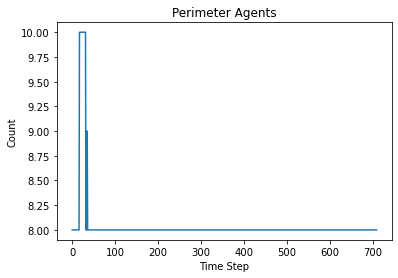

In [5]:
plt.plot(group.STEP,group.PERIM)
plt.title("Perimeter Agents")
plt.xlabel("Time Step")
plt.ylabel("Count")
plt.show()

<h1>AGGREGATED MAGNITUDE DATA</h1>

In [6]:
group1 = S[["STEP","IMAG"]].groupby('STEP').mean(0).reset_index()
group2 = S[["STEP","IMAG"]].groupby('STEP').std(0).reset_index()
group3 = S[["STEP","IMAG"]].groupby('STEP').max(0).reset_index()
group4 = S[["STEP","IMAG"]].groupby('STEP').min(0).reset_index()

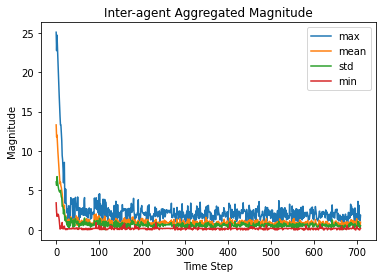

In [7]:
a = plt.plot(group3.STEP,group3.IMAG,label='max')
b = plt.plot(group1.STEP,group1.IMAG,label='mean')
c = plt.plot(group2.STEP,group2.IMAG,label='std')
d = plt.plot(group4.STEP,group4.IMAG,label='min')
plt.title("Inter-agent Aggregated Magnitude")
plt.legend()
plt.xlabel("Time Step")
plt.ylabel("Magnitude")
plt.show()

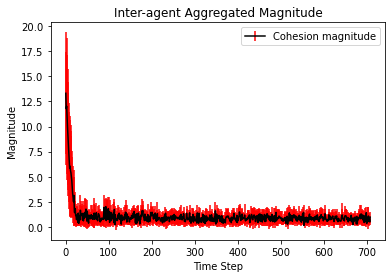

In [8]:
plt.errorbar(group1.STEP,group1.IMAG,group2.IMAG,label='Cohesion magnitude',ecolor='red',color='black')
plt.title("Inter-agent Aggregated Magnitude")
plt.legend()
plt.xlabel("Time Step")
plt.ylabel("Magnitude")
plt.show()

In [9]:
state1 = S[S["STEP"]==0].reset_index()
state2 = S[S["STEP"]==100].reset_index()
state3 = S[S["STEP"]==300].reset_index()

In [10]:
agents1 = state1[["X","Y"]]
agents2 = state2[["X","Y"]]
agents3 = state3[["X","Y"]]

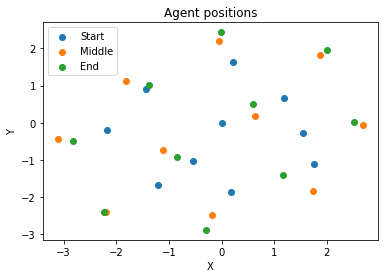

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(agents1["X"],agents1["Y"], label="Start")
ax1.scatter(agents2["X"],agents2["Y"], label="Middle")
ax1.scatter(agents3["X"],agents3["Y"], label="End")
plt.title("Agent positions")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()